# **Imports** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import shap

## **Data Loading**

In [3]:
diab_df=pd.read_csv('/Users/vladandreichuk/Desktop/git_reps/Comparative-Analysis-of-ML-Algorithms-Predicting-Hospital-Readmission-of-Diabetes-Patients/CP_Hospital_Readmission/diab_df_filtered.csv')

In [16]:
diab_df.head(20)

race  gender       age  admission_type_id  \
0         Caucasian  Female    [0-10)                  6   
1         Caucasian  Female   [10-20)                  1   
2   AfricanAmerican  Female   [20-30)                  1   
3         Caucasian    Male   [30-40)                  1   
4         Caucasian    Male   [40-50)                  1   
5         Caucasian    Male   [50-60)                  2   
6         Caucasian    Male   [60-70)                  3   
7         Caucasian    Male   [70-80)                  1   
8         Caucasian  Female   [80-90)                  2   
9         Caucasian  Female  [90-100)                  3   
10  AfricanAmerican  Female   [40-50)                  1   
11  AfricanAmerican    Male   [60-70)                  2   
12        Caucasian  Female   [40-50)                  1   
13        Caucasian    Male   [80-90)                  1   
14  AfricanAmerican  Female   [60-70)                  3   
15  AfricanAmerican    Male   [60-70)                  1   
16  AfricanAmerican    Male   [50-60)                  1   
17        Caucasian  Female   [50-60)                  1   
18  AfricanAmerican    Male   [70-80)                  1   
19        Caucasian    Male   [70-80)                  3   

    discharge_disposition_id  admission_source_id  time_in_hospital  \
0                         25                    1                 1   
1                          1                    7                 3   
2                          1                    7                 2   
3                          1                    7                 2   
4                          1                    7                 1   
5                          1                    2                 3   
6                          1                    2                 4   
7                          1                    7                 5   
8                          1                    4                13   
9                          3                    4                12   
10                         1                    7                 9   
11                         1                    4                 7   
12                         3                    7                 7   
13                         6                    7                10   
14                         1                    2                 1   
15                         3                    7                12   
16                         1                    7                 4   
17                         1                    7                 3   
18                         1                    7                 5   
19                         6                    2                 6   

   payer_code  num_lab_procedures  num_procedures  ...  glyburide  \
0         NaN                  41               0  ...         No   
1         NaN                  59               0  ...         No   
2         NaN                  11               5  ...         No   
3         NaN                  44               1  ...         No   
4         NaN                  51               0  ...         No   
5         NaN                  31               6  ...         No   
6         NaN                  70               1  ...         No   
7         NaN                  73               0  ...     Steady   
8         NaN                  68               2  ...         No   
9         NaN                  33               3  ...         No   
10        NaN                  47               2  ...         No   
11        NaN                  62               0  ...         Up   
12        NaN                  60               0  ...         No   
13        NaN                  55               1  ...         No   
14        NaN                  49               5  ...         No   
15        NaN                  75               5  ...         No   
16        NaN                  45               4  ...         No   
17        NaN       

In [5]:
diab_df['payer_code'].value_counts()

payer_code
MC    31739
HM     6218
SP     4956
BC     4625
MD     3492
CP     2498
UN     2425
CM     1907
OG     1023
PO      586
DM      546
CH      144
WC      135
OT       94
MP       79
SI       55
FR        1
Name: count, dtype: int64

In [5]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_inpatient          101766 non-null  int64 
 11  diag_1                    101766 non-null  object
 12  diag_2                    101766 non-null  object
 13  diag_3                    101766 non-null  object
 14  numb

## **Encode Columns**

In [4]:
col_names = diab_df.columns

In [5]:
col_names

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glipizide',
       'glyburide', 'pioglitazone', 'acarbose', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'outliers', 'outpatient', 'emergency'],
      dtype='object')

In [6]:
# Define which columns should be one-hot encoded or ordinal encoded
one_hot_columns = [
    "race",
    "gender",
    "admission_type_id",
    "discharge_disposition_id",
    "admission_source_id",
    'payer_code',
    "diag_1",
    "diag_2",
    "diag_3",
    "max_glu_serum",
    "A1Cresult",
    "metformin",
    "repaglinide",
    "glipizide",
    "glyburide",
    "pioglitazone",
    "acarbose",
    "insulin",
    "change",
    "diabetesMed",
    "outpatient",
    "emergency",
]
ordinal_columns = ["age", "outliers"]

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        (
            "onehot",
            OneHotEncoder(sparse_output=False, feature_name_combiner="concat"),
            one_hot_columns,
        ),
        ("ordinal", OrdinalEncoder(), ordinal_columns),
    ],
    remainder="passthrough",  # Pass through columns not specified for encoding
)

# Apply the preprocessor to the data
diab_df = preprocessor.fit_transform(diab_df)

In [7]:
diab_df = pd.DataFrame(diab_df,columns=preprocessor.get_feature_names_out(col_names))

In [8]:
# Remove prefixes ending with '__'
diab_df.columns = [col.split('__')[-1] if '__' in col else col for col in diab_df.columns]

In [9]:
diab_df

race_AfricanAmerican race_Asian race_Caucasian race_Hispanic  \
0                       0.0        0.0            1.0           0.0   
1                       0.0        0.0            1.0           0.0   
2                       1.0        0.0            0.0           0.0   
3                       0.0        0.0            1.0           0.0   
4                       0.0        0.0            1.0           0.0   
...                     ...        ...            ...           ...   
100109                  1.0        0.0            0.0           0.0   
100110                  1.0        0.0            0.0           0.0   
100111                  0.0        0.0            1.0           0.0   
100112                  0.0        0.0            1.0           0.0   
100113                  0.0        0.0            1.0           0.0   

       race_Other gender_Female gender_Male gender_Unknown/Invalid  \
0             0.0           1.0         0.0                    0.0   
1             0.0           1.0         0.0                    0.0   
2             0.0           1.0         0.0                    0.0   
3             0.0           0.0         1.0                    0.0   
4             0.0           0.0         1.0                    0.0   
...           ...           ...         ...                    ...   
100109        0.0           0.0         1.0                    0.0   
100110        0.0           1.0         0.0                    0.0   
100111        0.0           0.0         1.0                    0.0   
100112        0.0           1.0         0.0                    0.0   
100113        0.0           0.0         1.0                    0.0   

       admission_type_id_1 admission_type_id_2  ... emergency_1  age outliers  \
0                      0.0                 0.0  ...         0.0  0.0      0.0   
1                      1.0                 0.0  ...         0.0  1.0      0.0   
2                      1.0                 0.0  ...         0.0  2.0      0.0   
3                      1.0                 0.0  ...         0.0  3.0      0.0   
4                      1.0                 0.0  ...         0.0  4.0      0.0   
...                    ...                 ...  ...         ...  ...      ...   
100109                 1.0                 0.0  ...         0.0  7.0      0.0   
100110                 1.0                 0.0  ...         0.0  8.0      0.0   
100111                 1.0                 0.0  ...         0.0  7.0      0.0   
100112                 0.0                 1.0  ...         0.0  8.0      0.0   
100113                 1.0                 0.0  ...         0.0  7.0      0.0   

       time_in_hospital num_lab_procedures num_procedures num_medications  \
0                     1                 41              0               1   
1                     3                 59              0              18   
2                     2                 11              5              13   
3                     2                 44              1              16   
4                     1                 51              0               8   
...                 ...                ...            ...             ...   
100109                3                 51              0              16   
100110                5                 33              3              18   
100111                1                 53              0               9   
100112               10                 45              2              21   
100113                6                 13              3               3   

       number_inpatient number_diagnoses readmitted  
0                     0                1         NO  
1                     0                9        >30  
2                     1                6         NO  
3                     0                7         NO  
4                     0                5         NO  
...                 ...              ...        ...  
100109                0              

In [23]:
diab_df['readmitted'].value_counts()

readmitted
NO     53212
>30    35545
<30    11357
Name: count, dtype: int64

In [10]:
# Encode target variable
def encode_targets(y):
    le = LabelEncoder()
    le.fit(y)
    y_enc = le.transform(y)
    return y_enc


In [11]:
from imblearn.over_sampling import SVMSMOTE, BorderlineSMOTE, SMOTE
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
import copy
import keras
from keras import layers

2023-12-01 17:54:12.713222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
`import kerastuner` is deprecated, please use `import keras_tuner`.


## **Transforming and Splitting**

In [12]:
scaler = StandardScaler()

# New encoded features
X_enc = diab_df.drop(columns=["readmitted"])
# Transform y
y_enc = encode_targets(diab_df['readmitted'])

# Resampling the minority class
sm = SMOTETomek(sampling_strategy='minority')

# Fit the model to generate the data.
X_enc, y_enc = sm.fit_resample(X_enc, y_enc)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc , test_size=0.2, random_state=42, stratify=y_enc)

# Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md



# **ML Models**

## **Random Forest** 

### **Model** 

In [14]:
def rf_model(X, y, params, nsplits, scoring_metric):
    """
    Trains a Random Forest model using grid search with stratified k-fold cross-validation.

    Parameters:
      X (pd.DataFrame): The feature matrix.
      y (pd.Series): The target variable.
      params (dict): Hyperparameter grid for grid search.
      nsplits (int): Number of splits for stratified k-fold cross-validation.
      scoring_metric (str): Scoring metric for model evaluation.

    Returns:
      grid_search (GridSearchCV): Grid search object containing the results.
      best_rf_model (RandomForestClassifier): Trained Random Forest model with the best hyperparameters.
    """
    # Initialize the model
    model = RandomForestClassifier(random_state=42)

    # Perform grid search with stratified 10-fold cross-validation
    cv = StratifiedKFold(n_splits=nsplits)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring_metric)

    # Fit the model within the loop
    grid_search.fit(X, y)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Train the Random Forest model with the best hyperparameters
    best_rf_model = RandomForestClassifier(**best_params, random_state=42)

    # Fit the model within the loop
    best_rf_model.fit(X, y)

    return grid_search, best_rf_model


# Set up a grid of hyperparameters to search
param_grid = {"n_estimators": [100, 200, 300, 400], "max_depth": [None, 20, 30, 50, 70]}

# Fit the model
rf_gs, best_rf_model = rf_model(
    X_train,
    y_train,
    params=param_grid,
    nsplits=10,
    scoring_metric="f1_weighted",
)



### **Predictions and Evaluation** 

In [25]:
rf_gs.best_params_

{'max_depth': 50, 'n_estimators': 400}

In [126]:
def evaluate_model(model, X_test, y_test, cnn=False):
    """
    Evaluate a machine learning model's performance on the test set. Computes accuracy, precision, recall, f1 score, and AUC. It also plots a confusion matrix and ROC-AUC plot.

    Parameters:
      model: Trained machine learning model.
      X_test (pd.DataFrame): Feature matrix of the test set.
      y_test (pd.Series): True labels of the test set.
      cnn (Boolean): An indicator if the plot is for a CNN or not to adjust the predictions computation.

    Returns:
      y_pred (np.ndarray): Predicted labels.
      y_pred_prob (np.ndarray): Predicted probabilities.
      metrics (list): List of evaluation metrics [accuracy, precision, recall, f1, roc_auc].
    """
    if cnn == True:
        y_pred_prob = model.predict(X_test)
        y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        # Generate predictions
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)

    class_names = ["NO", ">30", "<30"]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class="ovr")

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Confusion Matrix
    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        confusion_matrix_result,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # Generate and plot ROC-AUC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    n_classes = len(np.unique(y_test))  # Number of unique classes

    y_test_binary = label_binarize(y_test, classes=list(range(n_classes)))

    # Create an empty figure
    fig = go.Figure()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Add ROC curve for each class
        fig.add_trace(
            go.Scatter(
                x=fpr[i],
                y=tpr[i],
                mode="lines",
                name=f"ROC curve (class {class_names[i]}) (AUC = {roc_auc[i]:.2f})",
            )
        )

    # Add diagonal line for reference
    fig.add_shape(
        type="line",
        x0=0,
        x1=1,
        y0=0,
        y1=1,
        line=dict(color="navy", width=2, dash="dash"),
    )

    # Update layout of the figure
    fig.update_layout(
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        title="ROC-AUC",
        xaxis=dict(range=[0, 1]),
        yaxis=dict(range=[0, 1.05]),
        legend=dict(x=0.01, y=0.99),
    )

    fig.show()

    return y_pred, y_pred_prob, [accuracy, precision, recall, f1, roc_auc]

Accuracy: 0.72
Precision: 0.74
Recall: 0.72
F1 Score: 0.71
ROC-AUC: 0.87


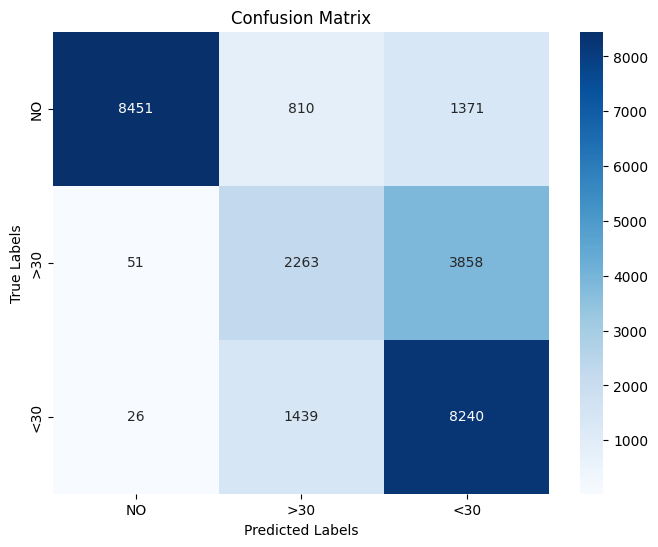

In [27]:
y_pred_rf, y_pred_prob_rf, rf_metrics_list = evaluate_model(best_rf_model, X_test, y_test)

## **Naive Bayes** 

### **Model** 

In [41]:
def nb_model(X, y, nsplits):
    # Define a Gaussian Naive Bayes model
    nb_model = GaussianNB()

    # Perform stratified k-fold cross-validation
    cv = StratifiedKFold(n_splits=nsplits)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores=[]

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train the Gaussian Naive Bayes model
        nb_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = nb_model.predict(X_test)
        y_pred_prob= nb_model.predict_proba(X_test)

        # Evaluate the model and compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class='ovr')

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        roc_auc_scores.append(roc_auc)

    # Calculate the average scores across all folds
    avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)
    avg_f1 = sum(f1_scores) / len(f1_scores)
    avg_auc = sum(roc_auc_scores) / len(roc_auc_scores)

    return nb_model,avg_accuracy, avg_precision, avg_recall, avg_f1, avg_auc


### **Predictions and Evaluation** 

In [42]:
# Extract and compute the 
nb_model,avg_accuracy, avg_precision, avg_recall, avg_f1, avg_auc = nb_model(X_train, y_train, nsplits=10)

print(f"Average CV Accuracy: {avg_accuracy:.2f}")
print(f"Average CV Precision: {avg_precision:.2f}")
print(f"Average CV Recall: {avg_recall:.2f}")
print(f"Average CV F1 Score: {avg_f1:.2f}")
print(f"Average CV ROC-AUC: {avg_auc:.2f}")

Average CV Accuracy: 0.41
Average CV Precision: 0.49
Average CV Recall: 0.41
Average CV F1 Score: 0.27
Average CV ROC-AUC: 0.61


Accuracy: 0.41
Precision: 0.48
Recall: 0.41
F1 Score: 0.28
ROC-AUC: 0.64


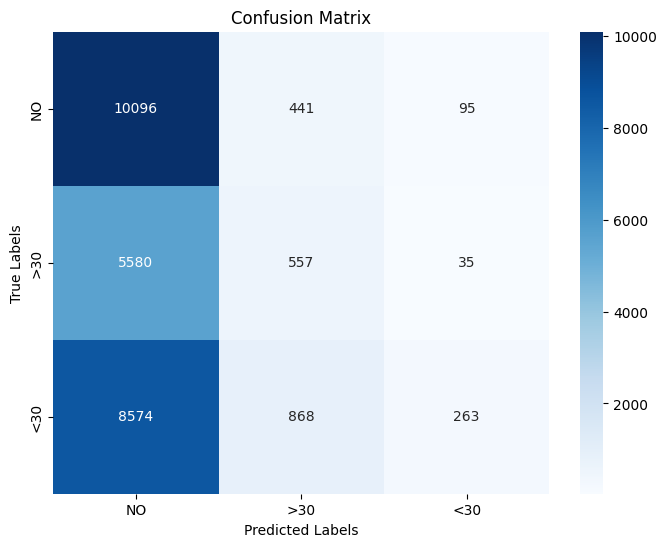

In [43]:
y_pred_nb, y_pred_prob_nb, nb_metrics_list = evaluate_model(nb_model, X_test, y_test)

## **SVM** 

In [ ]:
# Specify the number of instances you want in the subset
subset_size = 1000

# Use train_test_split with stratify
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=(len(X_train) - subset_size), stratify=y_train, random_state=42)

In [33]:
def svm_model(X, y, params, nsplits, scoring_metric):
    # Define an SVM model
    svm_model = SVC()

    # Perform grid search with stratified 10-fold cross-validation
    cv = StratifiedKFold(n_splits=nsplits)
    grid_search = GridSearchCV(svm_model, param_grid, cv=cv, scoring=scoring_metric)

    # Fit the model within the loop
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Train the SVM model with the best hyperparameters
    best_svm_model = SVC(**best_params)

    # Fit the model within the loop
    best_svm_model.fit(X_train, y_train)

    return grid_search, best_svm_model

# Set up a grid of hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
}

svm_gs, best_svm_model = svm_model(X_subset, y_subset, params=param_grid, nsplits=10, scoring_metric='f1_weighted')

KeyboardInterrupt: 

### **Predictions and Evaluation** 

In [ ]:
svm_gs.best_params_

In [ ]:
y_pred_svm, y_pred_prob_svm, svm_metrics_list = evaluate_model(best_svm_model, X_test, y_test)

## **K-Nearest Neighbours** 

### **Model** 

In [20]:
# Create and train the K-nearest neighbors model
def knn_model(X, y, params, nsplits, scoring_metric):
    """
    Create and train a K-nearest neighbors model using grid search for hyperparameter tuning.

    Parameters:
      X (pd.DataFrame): Feature matrix.
      y (pd.Series): Target variable.
      params (dict): Hyperparameter grid for grid search.
      nsplits (int): Number of splits for cross-validation.
      scoring_metric (str): Scoring metric for grid search.

    Returns:
      grid_search (GridSearchCV): Trained grid search object.
      best_knn_model (KNeighborsClassifier): Trained K-nearest neighbors model with best hyperparameters.
    """
    # Define an KNN model
    knn_model = KNeighborsClassifier()

    # Perform grid search with stratified 10-fold cross-validation
    cv = StratifiedKFold(n_splits=nsplits)
    grid_search = GridSearchCV(knn_model, param_grid, cv=cv, scoring=scoring_metric)

    grid_search.fit(X, y)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    best_knn_model = KNeighborsClassifier(**best_params)
    best_knn_model.fit(X, y)

    return grid_search, best_knn_model


# Set up a grid of hyperparameters to search
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "p": [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn_gs, best_knn_model = knn_model(
    X_train, y_train, params=param_grid, nsplits=10, scoring_metric="f1_weighted"
)

### **Predictions and Evaluation** 

In [21]:
# Make predictions and evaluate the K-nearest neighbors model
knn_gs.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Accuracy: 0.70
Precision: 0.68
Recall: 0.70
F1 Score: 0.68
ROC-AUC: 0.84


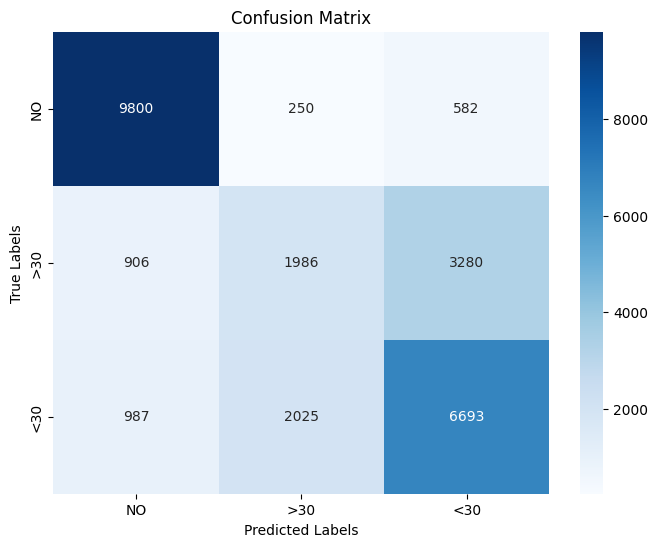

In [28]:
y_pred_knn, y_pred_prob_knn, knn_metrics_list = evaluate_model(knn_gs, X_test, y_test)

## **XGBoost** 

### **Model** 

In [22]:
def xgboost_model(X, y, params, nsplits, scoring_metric):
    """
    Train an XGBoost classifier using grid search for hyperparameter tuning.

    Parameters:
        X (array-like or pd.DataFrame): Features.
        y (array-like or pd.Series): Target variable.
        params (dict): Hyperparameter grid for grid search.
        nsplits (int): Number of splits for stratified k-fold cross-validation.
        scoring_metric (str): Scoring metric for grid search.

    Returns:
        tuple: Grid search object and the best-trained XGBoost model.
    """
    #Define an XGBoost model
    xgb_model = XGBClassifier(random_state=42)

    #Perform 10-fold CV and parameter GS
    cv = StratifiedKFold(n_splits=nsplits)
    grid_search = GridSearchCV(xgb_model, param_grid, cv=cv, scoring=scoring_metric)

    grid_search.fit(X, y)

    #Extract the best parameters and use them to train the model
    best_params = grid_search.best_params_

    best_xgb_model = XGBClassifier(**best_params, random_state=42)
    best_xgb_model.fit(X, y)

    return grid_search, best_xgb_model

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage used in the update
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples used for training
}

xgb_gs, best_xgb_model = xgboost_model(X_train, y_train, params=param_grid, nsplits=10, scoring_metric='f1_weighted')

### **Predictions and Evaluation** 

In [23]:
xgb_gs.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

Accuracy: 0.72
Precision: 0.74
Recall: 0.72
F1 Score: 0.72
ROC-AUC: 0.86


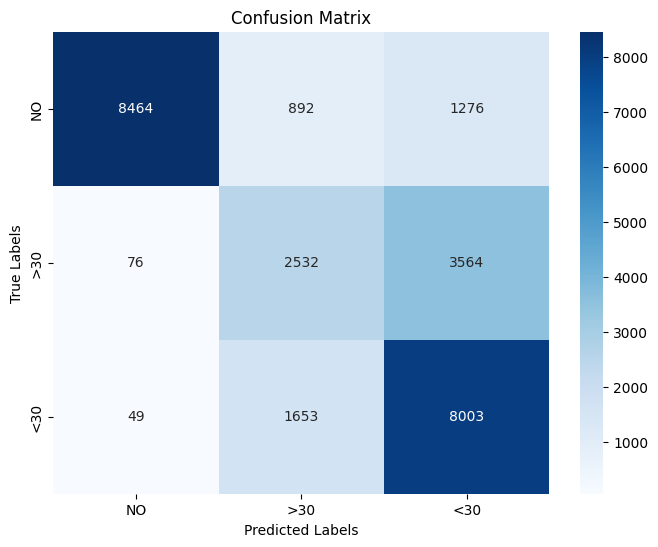

In [29]:
y_pred_xgb, y_pred_prob_xgb, xgb_metrics_list = evaluate_model(best_xgb_model, X_test, y_test)

## **CNN** 

### **Model** 

In [108]:
# Function to create the CNN model
def cnn_hypertune(hp):
    """
    Create a Convolutional Neural Network (CNN) model for hyperparameter tuning.

    Parameters:
        hp (kerastuner.HyperParameters): Hyperparameter search space.

    Returns:
        keras.Sequential: Compiled CNN model.
    """
    model = keras.Sequential()

    # Convolutional layers
    for i in range(hp.Int("num_conv_layers", min_value=2, max_value=4)):
        model.add(
            layers.Conv1D(
                filters=hp.Int(f"filters_{i}", min_value=32, max_value=256, step=32),
                kernel_size=hp.Choice(f"kernel_size_{i}", values=[5, 7, 9]),
                activation="relu",
                input_shape=(153, 1),
            )
        )

    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Flatten())

    # Dense layers
    for i in range(hp.Int("num_dense_layers", min_value=2, max_value=4)):
        model.add(
            layers.Dense(
                units=hp.Int(
                    f"dense_units_{i}", min_value=128, max_value=512, step=128
                ),
                activation="relu",
            )
        )

    model.add(
        layers.Dropout(
            rate=hp.Float(f"dropout_rate", min_value=0.2, max_value=0.5, step=0.2)
        )
    )

    # Output layer
    model.add(layers.Dense(3, activation="softmax"))

    opt = keras.optimizers.Adam(learning_rate=0.0001)

    # Compile the model
    model.compile(
        optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    return model


# Define callbacks
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=2, min_lr=0, mode="min", verbose=1
)
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True, verbose=1
)

# Instantiate the tuner
tuner = RandomSearch(
    cnn_hypertune,
    objective="val_accuracy",
    max_trials=10,  # Number of hyperparameter combinations to try
    directory="cnn_hypertuning",  # Directory to store the search results
    project_name="cnn_hyperparameter_tuning",
)

# Search for the best hyperparameters
tuner.search(
    X_train, y_train, epochs=6, validation_split=0.2, callbacks=[reduce_lr, early_stop]
)

Reloading Tuner from cnn_hypertuning/cnn_hyperparameter_tuning/tuner0.json


### **Predictions and Evaluation** 

In [109]:
# Get the best hyperparameters
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[
    0
].hyperparameters.values

print(best_hyperparameters)

{'num_conv_layers': 3, 'filters_0': 64, 'kernel_size_0': 5, 'filters_1': 192, 'kernel_size_1': 7, 'num_dense_layers': 3, 'dense_units_0': 128, 'dense_units_1': 512, 'dropout_rate': 0.2, 'filters_2': 160, 'kernel_size_2': 9, 'filters_3': 32, 'kernel_size_3': 9, 'dense_units_2': 512, 'dense_units_3': 128}


In [110]:
# Build the model with the best hyperparameters
best_cnn_model = tuner.get_best_models(num_models=1)[0]

829/829 [==============================] - 12s 14ms/step
Accuracy: 0.70
Precision: 0.72
Recall: 0.70
F1 Score: 0.70
ROC-AUC: 0.86


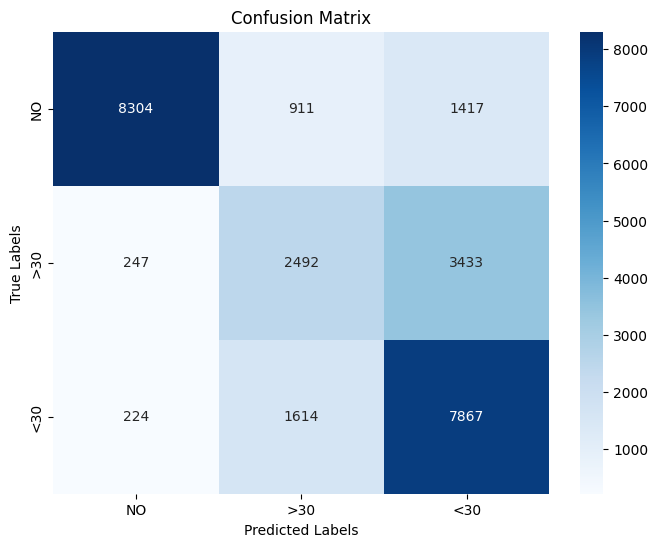

In [127]:
# Evaluate the CNN model
y_pred_cnn, y_pred_prob_cnn, cnn_metrics_list = evaluate_model(best_cnn_model, X_test, y_test,cnn=True)

## **GA-CNN** 

### **Model** 

In [112]:
num_classes = 3
input_shape = (153,1)

In [113]:
# Define search space for hyperparameters
search_space = {
    "filters": [32, 64, 128, 256],
    "kernel_size": [3, 5, 7, 9],
    "pool_size": [2],
    "dense_units_1": [256, 512],
    "dense_units_2": [124, 256],
    "dropout_rate": [0.3, 0.5],
    "epochs": [5],
}

# Hyperparameters for GA
population_size = 4
num_generations = 3
mutation_rate = 0.3


# Fitness function
def fitness(model, X, y, v1, v2, alpha, beta, epsilon):
    loss, accuracy = model.evaluate(X, y, verbose=0)
    return alpha * accuracy * v1 + beta / (loss + epsilon) * v2


# Create CNN model based on hyperparameters
def create_cnn_model(
    filters,
    kernel_size,
    pool_size,
    dense_units_1,
    dense_units_2,
    dropout_rate,
    epochs,
    v1,
    v2,
    total_filters,
    total_kernels,
    total_neurons,
    total_epochs,
    fitness=0,
):
    model = keras.Sequential()
    model.add(
        layers.Conv1D(
            filters=filters,
            kernel_size=(kernel_size,),
            activation="relu",
            input_shape=input_shape,
        )
    )
    model.add(
        layers.Conv1D(filters=filters, kernel_size=(kernel_size,), activation="relu")
    )
    model.add(layers.MaxPooling1D(pool_size=(pool_size,)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=dense_units_1, activation="relu"))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(units=dense_units_2, activation="relu"))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(num_classes, activation="softmax"))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(
        optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    return model


# Function to calculate v1 and v2
def calculate_v1(individual):
    return (
        0.3 * (individual["filters"] / individual["total_filters"])
        + 0.3 * (individual["kernel_size"] / individual["total_kernels"])
        + 0.2 * (individual["dense_units_1"] / individual["total_neurons"])
        + 0.2 * (individual["total_epochs"] / 1.5)
    )


def calculate_v2(individual):
    return (
        0.3 * (1 - individual["filters"] / individual["total_filters"])
        + 0.3 * (1 - individual["kernel_size"] / individual["total_kernels"])
        + 0.2 * (1 - individual["dense_units_1"] / individual["total_neurons"])
        + 0.2 * (1 - individual["total_epochs"] / 1.5)
    )


# set a callback to automatically adjust learning rate
rlronp = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, verbose=1
)

# set a callback to stop training if the model is not improving for a long time
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=4,
    verbose=1,
    mode="auto",
)

# Main Genetic Algorithm
population = []

for _ in range(population_size):
    individual = {
        "filters": np.random.choice(search_space["filters"]),
        "kernel_size": np.random.choice(search_space["kernel_size"]),
        "pool_size": np.random.choice(search_space["pool_size"]),
        "dense_units_1": np.random.choice(search_space["dense_units_1"]),
        "dense_units_2": np.random.choice(search_space["dense_units_2"]),
        "dropout_rate": np.random.choice(search_space["dropout_rate"]),
        "epochs": np.random.choice(search_space["epochs"]),
        "v1": 0,
        "v2": 0,
        "total_filters": 0,
        "total_kernels": 0,
        "total_neurons": 0,
        "total_epochs": 0,
    }
    population.append(individual)

for generation in range(num_generations):
    print(f"Generation {generation + 1}/{num_generations}")

    for individual in population:
        model = create_cnn_model(**individual)
        model.fit(
            X_train,
            y_train,
            epochs=individual["epochs"],
            validation_split=0.2,
            verbose=1,
            callbacks=[rlronp, early_stop],
        )

        # Update total counts
        individual["total_filters"] += individual["filters"]
        individual["total_kernels"] += individual["kernel_size"]
        individual["total_neurons"] += individual["dense_units_1"]
        individual["total_epochs"] += individual["epochs"]

        # Update v1 and v2
        individual["v1"] = calculate_v1(individual)
        individual["v2"] = calculate_v2(individual)

        individual["fitness"] = fitness(
            model,
            X_test,
            y_test,
            v1=individual["v1"],
            v2=individual["v2"],
            alpha=0.99,
            beta=0.01,
            epsilon=1e-7,
        )

    # Select the top performers for the next generation
    population = sorted(population, key=lambda x: x["fitness"], reverse=True)[
        :population_size
    ]

    # Crossover
    new_population = copy.deepcopy(population)
    for i in range(0, len(population) - 1, 2):
        parent1 = population[i]
        parent2 = population[i + 1]
        child1 = {
            "filters": parent1["filters"],
            "kernel_size": parent2["kernel_size"],
            "pool_size": parent1["pool_size"],
            "dense_units_1": parent2["dense_units_1"],
            "dense_units_2": parent2["dense_units_2"],
            "dropout_rate": parent1["dropout_rate"],
            "epochs": parent2["epochs"],
            "v1": 0,
            "v2": 0,
            "total_filters": 0,
            "total_kernels": 0,
            "total_neurons": 0,
            "total_epochs": 0,
        }
        child2 = {
            "filters": parent2["filters"],
            "kernel_size": parent1["kernel_size"],
            "pool_size": parent2["pool_size"],
            "dense_units_1": parent1["dense_units_1"],
            "dense_units_2": parent1["dense_units_2"],
            "dropout_rate": parent2["dropout_rate"],
            "epochs": parent1["epochs"],
            "v1": 0,
            "v2": 0,
            "total_filters": 0,
            "total_kernels": 0,
            "total_neurons": 0,
            "total_epochs": 0,
        }
        new_population.append(child1)
        new_population.append(child2)

    # Mutation
    for individual in new_population:
        if np.random.rand() < mutation_rate:
            hyperparameter_to_mutate = np.random.choice(list(search_space.keys()))
            individual[hyperparameter_to_mutate] = np.random.choice(
                search_space[hyperparameter_to_mutate]
            )

    # Evaluate fitness for each individual in the new population
    for individual in new_population:
        model = create_cnn_model(**individual)
        model.fit(
            X_train,
            y_train,
            epochs=individual["epochs"],
            validation_split=0.2,
            verbose=1,
            callbacks=[rlronp, early_stop],
        )

        # Update total counts
        individual["total_filters"] += individual["filters"]
        individual["total_kernels"] += individual["kernel_size"]
        individual["total_neurons"] += individual["dense_units_1"]
        individual["total_epochs"] += individual["epochs"]

        # Update v1 and v2
        individual["v1"] = calculate_v1(individual)
        individual["v2"] = calculate_v2(individual)

        individual["fitness"] = fitness(
            model,
            X_test,
            y_test,
            v1=individual["v1"],
            v2=individual["v2"],
            alpha=0.99,
            beta=0.01,
            epsilon=1e-7,
        )

    # Select the top performers for the next generation from the new population
    population = sorted(new_population, key=lambda x: x["fitness"], reverse=True)[
        :population_size
    ]

    # Print the best individual's fitness in this generation
    print("Best Fitness:", population[0]["fitness"])

Generation 1/5
Epoch 1/5
2651/2651 [==============================] - 254s 95ms/step - loss: 0.8456 - accuracy: 0.5923 - val_loss: 0.7026 - val_accuracy: 0.6743 - lr: 1.0000e-04
Epoch 2/5
2651/2651 [==============================] - 252s 95ms/step - loss: 0.7004 - accuracy: 0.6661 - val_loss: 0.6817 - val_accuracy: 0.6816 - lr: 1.0000e-04
Epoch 3/5
2651/2651 [==============================] - 252s 95ms/step - loss: 0.6827 - accuracy: 0.6765 - val_loss: 0.6796 - val_accuracy: 0.6835 - lr: 1.0000e-04
Epoch 4/5
2651/2651 [==============================] - 252s 95ms/step - loss: 0.6717 - accuracy: 0.6833 - val_loss: 0.6674 - val_accuracy: 0.6858 - lr: 1.0000e-04
Epoch 5/5
2651/2651 [==============================] - 252s 95ms/step - loss: 0.6642 - accuracy: 0.6884 - val_loss: 0.6608 - val_accuracy: 0.6897 - lr: 1.0000e-04
Epoch 1/5
2651/2651 [==============================] - 431s 162ms/step - loss: 0.8574 - accuracy: 0.5829 - val_loss: 0.6988 - val_accuracy: 0.6708 - lr: 1.0000e-04
Epoch 

KeyboardInterrupt: 

### **Predictions and Evaluation** 

In [ ]:
# Retrieve the best hyperparameters
best_hyperparameters = population[0]
print("Best Hyperparameters:", best_hyperparameters)

In [ ]:
best_ga_cnn_model= create_cnn_model(**best_hyperparameters)
best_ga_cnn_model.fit(X_train, y_train,epochs=10, batch_size=32,validation_split=0.2, verbose=1,callbacks=[rlronp,early_stop])

In [ ]:
# Evaluate the CNN model
y_pred_cnn_ga, y_pred_prob_cnn_ga, cnn_ga_metrics_list = evaluate_model(best_ga_cnn_model, X_test, y_test,cnn=True)

# **ML Results Interpretation** 

## **CNN Interpretation**

In [115]:
# Compute SHAP values for the 100 train data points for CNN
explainer_cnn = shap.Explainer(best_cnn_model,X_train[:100])
shap_values_cnn = explainer_cnn.shap_values(X_train[100:200])

PermutationExplainer explainer: 101it [27:10, 16.31s/it]                         


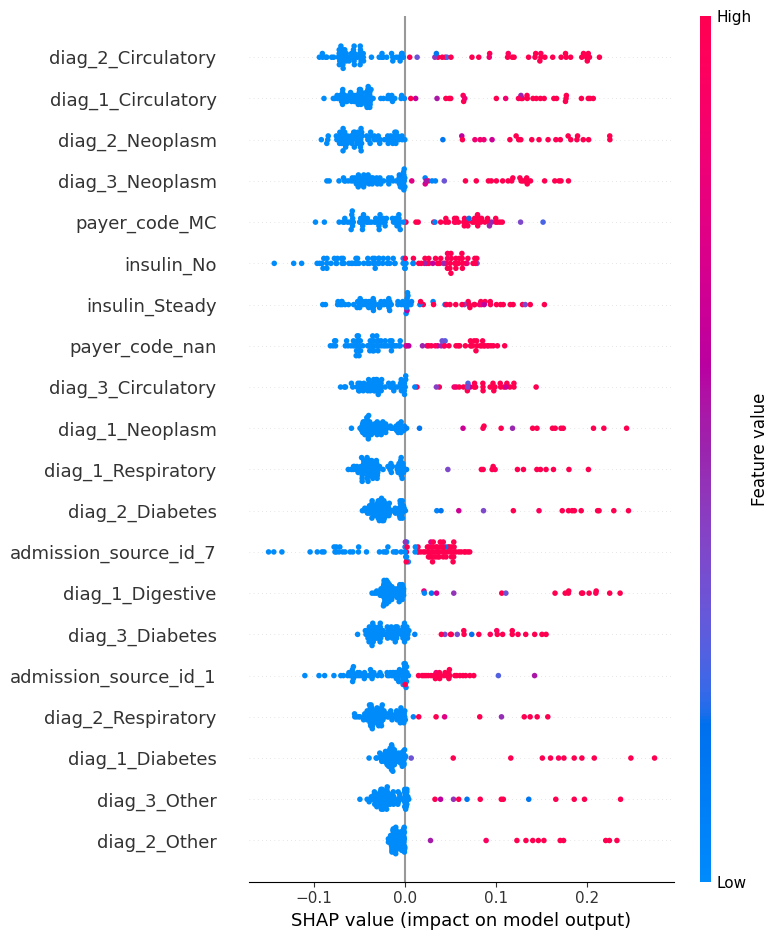

In [118]:
# SHAP importances for class 0 with CNN
shap.summary_plot(shap_values_cnn[:, :, 0], X_train[100:200],feature_names=diab_df.columns)

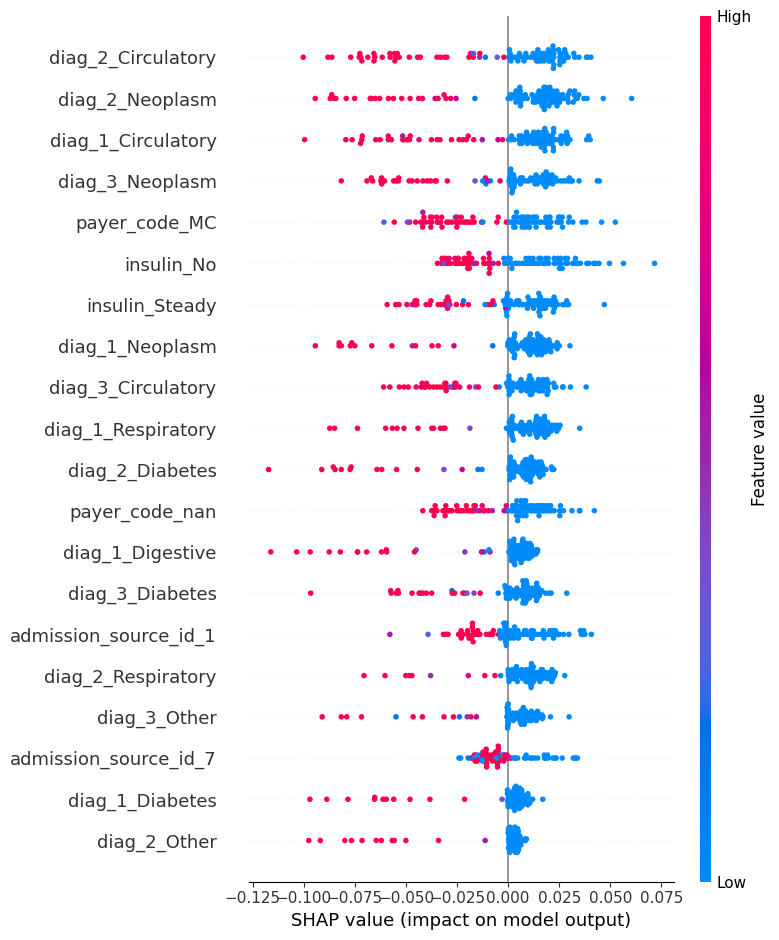

In [119]:
# SHAP importances for class 1 with CNN
shap.summary_plot(shap_values_cnn[:, :, 1], X_train[100:200],feature_names=diab_df.columns)

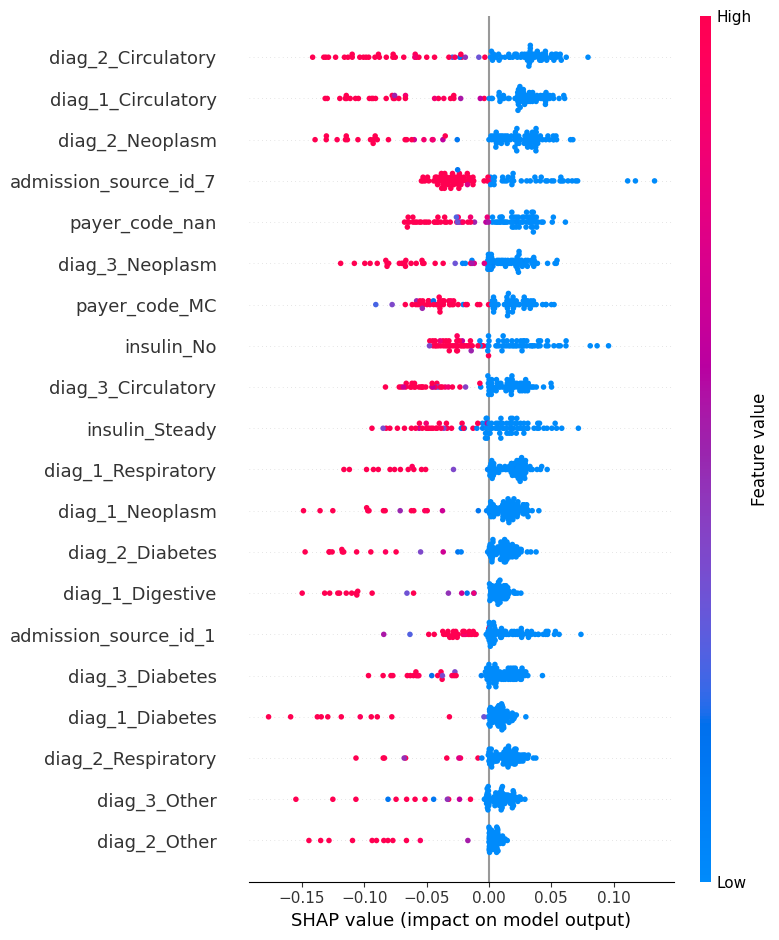

In [120]:
# SHAP importances for class 2 with CNN
shap.summary_plot(shap_values_cnn[:, :, 2], X_train[100:200],feature_names=diab_df.columns)

## **RF Interpretation**

In [72]:
# Extract feature importances from the RF model
feature_importance = best_rf_model.feature_importances_

# Get feature names
feature_names = X_enc.columns  


In [122]:
# Create a DataFrame for plotting
df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Sort the DataFrame by feature importance
df = df.sort_values(by="Importance", ascending=False)

# Choose the top N features to display
top_n = 20  
df_top_n = df.head(top_n)

# Plotting
fig = px.bar(
    df_top_n,
    x="Importance",
    y="Feature",
    orientation="h",
    labels={"Importance": "Feature Importance", "Feature": "Feature"},
    title=f"Top {top_n} Random Forest Feature Importances",
)

# Update layout for better readability
fig.update_layout(
    yaxis=dict(categoryorder="total ascending"), xaxis=dict(title="Feature Importance")
)

# Ensure that all features are labeled on the y-axis
fig.update_yaxes(tickmode="array", tickvals=list(df_top_n["Feature"]))

# Show the plot
fig.show()

In [133]:
# Compute SHAP values for the train data for RF
explainer_rf = shap.Explainer(best_rf_model)
shap_values_rf = explainer_rf(X_train[100:200])

## **XGBoost Interpretation**

In [121]:
# Get feature importances from the XGBoost model
importances = best_xgb_model.get_booster().get_score(importance_type="weight")

# Map feature indices to feature names
importances = {
    feature_names[int(index[1:])] if index.startswith("f") else index: importance
    for index, importance in importances.items()
}

# Sort the features by importance in descending order
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=False)

# Take the top 20 most important features
top_features = dict(sorted_importances[-20:])

# Create a Plotly bar plot
fig = px.bar(
    x=list(top_features.values()),
    y=list(top_features.keys()),
    orientation="h",
    labels={"x": "Importance", "y": "Feature"},
    title="Top 20 XGBoost Feature Importances",
    width=800,
    height=500,
)

# Show the plot
fig.show()

In [128]:
# Compute SHAP values for the train data for XGBoost
explainer_xgb = shap.Explainer(best_xgb_model)
shap_values_xgb = explainer_xgb(X_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning:

[15:47:09] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning:

[15:47:12] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



In [92]:
shap.plots.initjs()

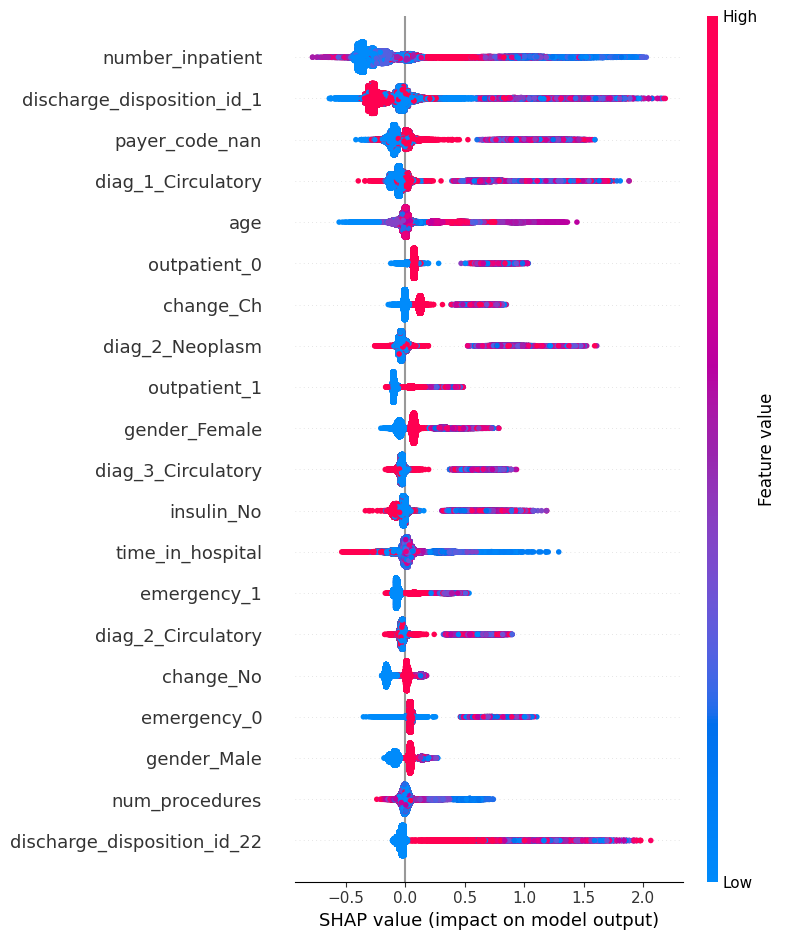

In [129]:
# SHAP importances for class 0 with XGBoost
shap.summary_plot(shap_values_xgb[:, :, 0], X_train,feature_names=diab_df.columns)

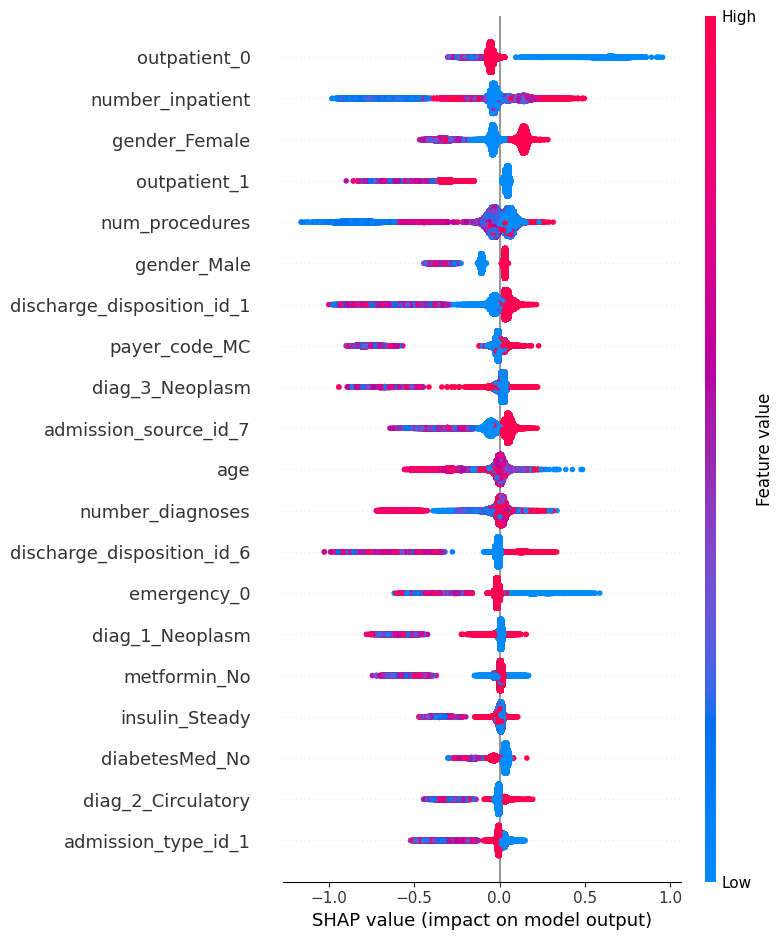

In [130]:
# SHAP importances for class 1 with XGBoost
shap.summary_plot(shap_values_xgb[:, :, 1], X_train,feature_names=diab_df.columns)

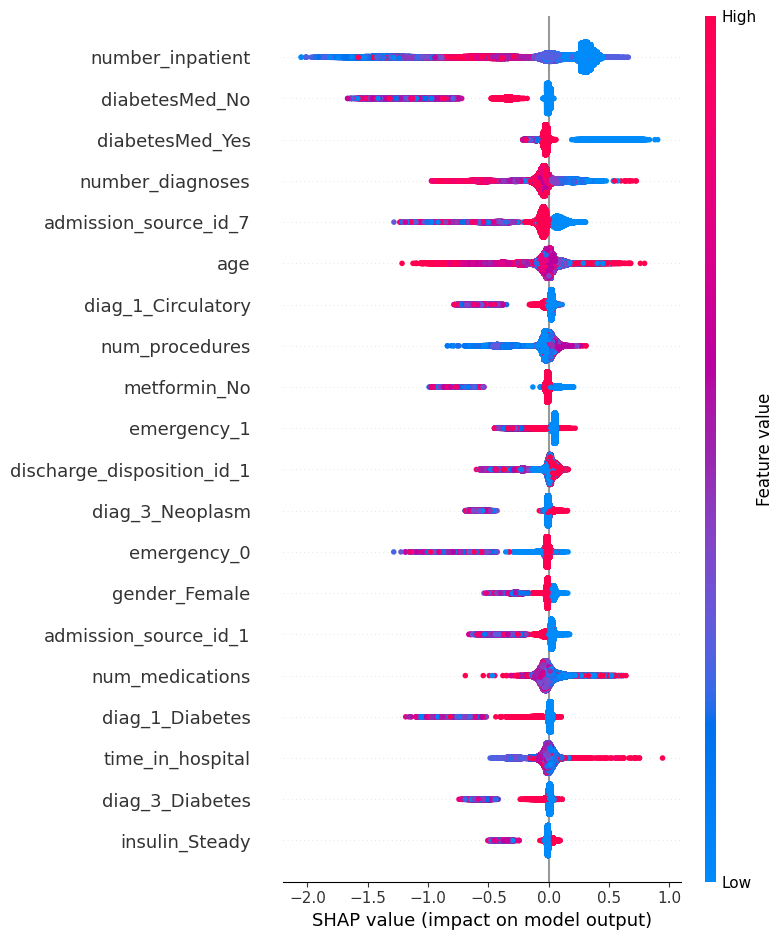

In [132]:
# SHAP importances for class 2 with XGBoost
shap.summary_plot(shap_values_xgb[:, :, 2], X_train,feature_names=diab_df.columns)